In [70]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import MaxPool2D, Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from tensorflow import keras

In [64]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

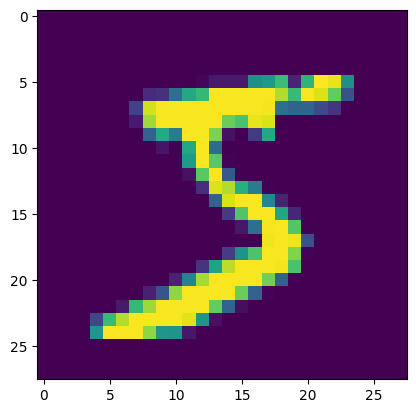

In [65]:
plt.imshow(x_train[0])

In [66]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [67]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [73]:
model = keras.Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = (28,28,1), padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


In [74]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1568)              0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [75]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs= 3)

Epoch 1/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2710 - accuracy: 0.9465 - val_loss: 0.0697 - val_accuracy: 0.9767
Epoch 2/3
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0736 - accuracy: 0.9791 - val_loss: 0.0521 - val_accuracy: 0.9826
Epoch 3/3
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0546 - accuracy: 0.9840 - val_loss: 0.0533 - val_accuracy: 0.9844


In [122]:
y_hat = model.predict(x_test[10:20])
y_hat

1/1 [==============================] - 0s 24ms/step


array([[9.9999928e-01, 3.6795449e-11, 5.6897380e-07, 1.3849295e-10,
        1.1792500e-10, 2.2468321e-09, 1.1015169e-08, 2.4778957e-10,
        4.3595179e-08, 5.6887476e-08],
       [4.0810239e-05, 3.4882064e-10, 8.2694129e-11, 1.2554894e-14,
        2.4618549e-10, 1.7813591e-11, 9.9995923e-01, 4.5154817e-12,
        9.5144781e-11, 9.9146570e-13],
       [9.1806987e-12, 2.7656675e-12, 3.8823658e-12, 2.3888638e-06,
        1.7816777e-03, 1.2156957e-07, 6.3466010e-11, 1.1745447e-08,
        3.4315131e-06, 9.9821234e-01],
       [1.0000000e+00, 1.8250752e-12, 2.1956650e-09, 1.9026991e-13,
        2.4460087e-10, 2.6707672e-09, 4.6212186e-08, 1.8130397e-08,
        9.4391339e-10, 2.2260778e-08],
       [6.3866075e-08, 9.9999356e-01, 3.1432972e-08, 3.3178028e-06,
        8.8009818e-07, 5.2197105e-08, 3.9004506e-09, 3.3883456e-08,
        1.9262072e-06, 2.4478496e-07],
       [9.8104130e-17, 4.8519133e-10, 2.2131285e-11, 1.7675228e-06,
        6.6608970e-14, 9.9999821e-01, 4.0465122e-16, 4.29

In [123]:
y_label = np.argmax(y_hat, axis=1)
y_label

array([0, 6, 9, 0, 1, 5, 9, 7, 3, 4], dtype=int64)

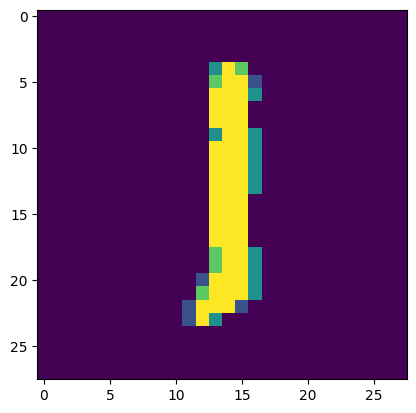

In [126]:
(x_train, y_train), (x_test1, y_test) = mnist.load_data()
plt.imshow(x_test1[14])


In [95]:
model.save("mnist2.hdf5")

In [127]:
# import tensorflow as tf
# img = tf.keras.utils.load_img(path="6.jpeg", color_mode= 'grayscale')
# img = tf.keras.utils.img_to_array(img)
# plt.imshow(tf.keras.utils.array_to_img(img), cmap="gray")
# test_img = img.reshape((1, 28, 28, 1))
# # model.predict(test_img)
# # img_class = model.predict_classes(test_img)
# img_class = np.argmax(model.predict(test_img), axis = 1)
# prediction = img_class[0]
# prediction